# Modelação com Random Forest

## Objetivo
Testar o algoritmo **Random Forest** (Florestas Aleatórias) para comparar o seu desempenho com o XGBoost, especialmente na previsão de Empates.

Utilizaremos:
1.  **Mesmo Set de Features Avançadas** (xG, Posse, Forma, etc.) para comparação justa.
2.  **Class Weights Balanced** para lidar com o desequilíbrio de classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1. Carregar Dados
try:
    df = pd.read_csv(r"d:\Diogo\Ambiente de Trabalho\PROJETO\Datasets\dataset_final_merged_v2.csv", low_memory=False)
    print("Dataset carregado com sucesso.")
except FileNotFoundError:
    print("Erro: Ficheiro não encontrado.")

Dataset carregado com sucesso.


In [3]:
# 2. Definição de Features (Set Avançado - Igual ao XGBoost)
features = [
    # Histórico Geral
    'Home_hist_Pontos', 'Home_hist_GolosMarcados', 'Home_hist_GolosSofridos',
    'Home_hist_DiferençaDeGolos', 'Home_hist_Vitórias', 'Home_hist_Derrotas', 'Home_hist_Empates',
    'Away_hist_Pontos', 'Away_hist_GolosMarcados', 'Away_hist_GolosSofridos',
    'Away_hist_DiferençaDeGolos', 'Away_hist_Vitórias', 'Away_hist_Derrotas', 'Away_hist_Empates',
    
    # Forma Recente (5 Jogos)
    'Casa_Form_Pts5', 'Casa_Form_GM5', 'Casa_Form_GS5',
    'Visitante_Form_Pts5', 'Visitante_Form_GM5', 'Visitante_Form_GS5',
    'Casa_Form_Empates5', 'Visitante_Form_Empates5',
    
    # Métricas Avançadas (xG, Posse, etc.)
    'Home_hist_GolosEsperados', 'Home_hist_GolosEsperadosSofridos',
    'Away_hist_GolosEsperados', 'Away_hist_GolosEsperadosSofridos',
    'Home_hist_PosseDeBola', 'Away_hist_PosseDeBola',
    'Home_hist_PassesProgressivos', 'Away_hist_PassesProgressivos',
    'Home_hist_JogosSemSofrerGolos', 'Away_hist_JogosSemSofrerGolos'
]

# Limpeza de NaNs nas features
df = df.dropna(subset=features)

X = df[features]
y = df['Resultado_Final']

# Encoding do Target
le = LabelEncoder()
y = le.fit_transform(y)
print(f"Classes Mapeadas: {list(zip(le.classes_, le.transform(le.classes_)))} ")

Classes Mapeadas: [('A', np.int64(0)), ('D', np.int64(1)), ('H', np.int64(2))] 


In [4]:
# 3. Split Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Treino: (3540, 32), Teste: (885, 32)


In [5]:
# 4. Treinar Random Forest (Com Class Weight)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,        # Limitar profundidade para evitar overfitting
    class_weight='balanced', # Importante para os empates
    random_state=42,
    n_jobs=-1            # Usar todos os cores
)

print("A treinar Random Forest...")
rf_model.fit(X_train, y_train)
print("Concluído.")

A treinar Random Forest...
Concluído.


Accuracy Teste: 0.501

Classification Report:
              precision    recall  f1-score   support

           A       0.56      0.48      0.51       270
           D       0.33      0.48      0.39       232
           H       0.65      0.53      0.58       383

    accuracy                           0.50       885
   macro avg       0.51      0.50      0.50       885
weighted avg       0.54      0.50      0.51       885



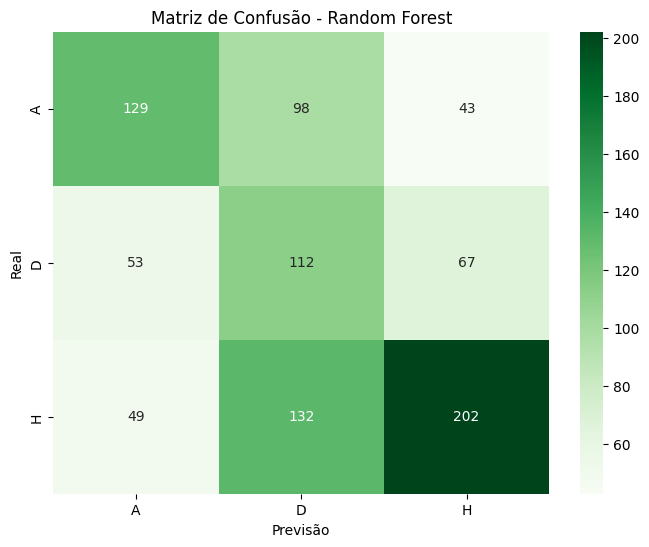

In [6]:
# 5. Avaliação
y_pred = rf_model.predict(X_test)
target_names = [str(c) for c in le.classes_]

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Teste: {acc:.3f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Real')
plt.xlabel('Previsão')
plt.show()

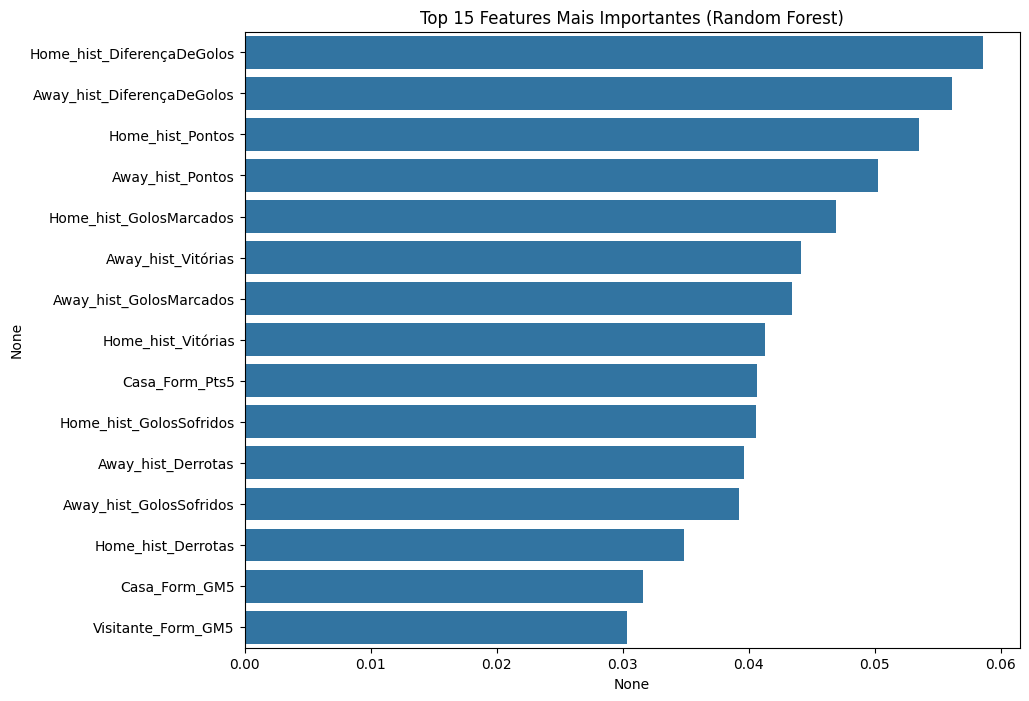

In [7]:
# 6. Feature Importance
importances = rf_model.feature_importances_
feature_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp.head(15), y=feature_imp.head(15).index)
plt.title("Top 15 Features Mais Importantes (Random Forest)")
plt.show()